<a href="https://colab.research.google.com/github/rochefort8/AnalogCounter-NN/blob/master/analogcounter_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 新しいセクション

In [163]:
from google.colab import drive
drive.mount('/content/drive')

!rm -rf /var/test
!rm -rf /var/input

!tar zxpf  "/content/drive/My Drive/AC/input.tar.gz" -C /var 
!tar zxpf  "/content/drive/My Drive/AC/test.tar.gz" -C /var 
#!tar zxpf /var/input.tar.gz -C /var
#!tar zxpf /var/test.tar.gz -C /var

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!rm /var/input.tar.gz

In [0]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from PIL import Image
from io import BytesIO 

import cv2 as cv

import matplotlib.pyplot as plt
import numpy as np
import os

from keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:

# the data, split between train and test sets
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(type(y_train))

0
1
2
3
4
5
6
7
8
9
0


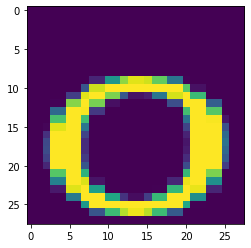

In [167]:
X=[]
Y=[]

for number in range (10):  
  path = "/var/input/" + str(number) + "/"
  files = os.listdir(path)
  print(number)
  for file in files:
      img = np.asarray(cv.imread(path + file,0))

#      threshold = 66
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)

      X.append(img)
      Y.append(number)

np.random.seed(1)
np.random.shuffle(X)
np.random.seed(1)
np.random.shuffle(Y)

#x_train = np.array(X)
#y_train = np.array(Y)
_x_train, _x_test, _y_train, _y_test =train_test_split(X, Y, test_size=0.33, random_state=111)
x_train = np.array(_x_train)
x_test = np.array(_x_test)
y_train = np.array(_y_train)
y_test = np.array(_y_test)

idx = 704
plt.imshow(x_train[idx])
print(y_train[idx])

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
XX=[]
YY=[]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  del XX[:]
  del YY[:]
  for file in files:
#      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0))
      threshold = 66
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
      XX.append(img)
      YY.append(number)

np.random.seed(1)
np.random.shuffle(XX)
np.random.seed(1)
np.random.shuffle(YY)

#x_test = np.array(XX)
#y_test = np.array(YY)
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [169]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
model.save('/var/tmp/ac')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)

x_train shape: (7530, 28, 28, 1)
7530 train samples
3710 test samples
Train on 7530 samples, validate on 3710 samples
Epoch 1/12
7530/7530 [==============================] - 2s 288us/step - loss: 1.0425 - acc: 0.6660 - val_loss: 0.2866 - val_acc: 0.9237
Epoch 2/12
7530/7530 [==============================] - 1s 70us/step - loss: 0.2544 - acc: 0.9290 - val_loss: 0.1253 - val_acc: 0.9685
Epoch 3/12
7530/7530 [==============================] - 1s 69us/step - loss: 0.1359 - acc: 0.9627 - val_loss: 0.0695 - val_acc: 0.9811
Epoch 4/12
7530/7530 [==============================] - 1s 68us/step - loss: 0.0865 - acc: 0.9744 - val_loss: 0.0600 - val_acc: 0.9841
Epoch 5/12
7530/7530 [==============================] - 1s 68us/step - loss: 0.0594 - acc: 0.9841 - val_loss: 0.0415 - val_acc: 0.9898
Epoch 6/12
7530/7530 [==============================] - 1s 68us/step - loss: 0.0553 - acc: 0.9838 - val_loss: 0.0370 - val_acc: 0.9906
Epoch 7/12
7530/7530 [==============================] - 1s 67us/step - 

Number :0
Test loss: 0.003940483555197716
Test accuracy: 1.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number :1
Test loss: 0.10937874138355255
Test accuracy: 0.98
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number :2
Test loss: 0.4985552132129669
Test accuracy: 0.800000011920929
[2 2 6 2 2 2 2 2 6 2 2 6 2 2 2 2 2 2 2 2 2 2 6 2 6]
Number :3
Test loss: 0.10887398570775986
Test accuracy: 0.9599999785423279
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1]
Number :4
Test loss: 0.15436412394046783
Test accuracy: 0.9200000166893005
[4 4 4 4 4 4 4 4 4 4 4 8 4 4 8 4 4 4 4 4 4 4 4 4 4]
Number :5
Test loss: 0.11813192069530487
Test accuracy: 1.0
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
Number :6
Test loss: 0.00022546602122019976
Test accuracy: 1.0
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
Number :7
Test loss: 0.04159882664680481
Test accuracy: 1.0
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Numbe

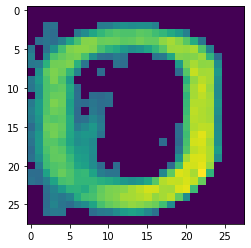

In [172]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
XX=[]
YY=[]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  del XX[:]
  del YY[:]

  for file in files:
#      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0))
      threshold = 66
#      threshold = 100
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)

      XX.append(img)
      YY.append(number)

  x_data = np.array(XX) 
  y_data = np.array(YY)

  if K.image_data_format() == 'channels_first':
    x_data = x_data.reshape(x_data.shape[0], 1, img_rows, img_cols)
  else:
    x_data = x_data.reshape(x_data.shape[0], img_rows, img_cols, 1)

  x_data = x_data.astype('float32')
  x_data /= 255
  y_data = keras.utils.to_categorical(y_data, num_classes)
  score = model.evaluate(x_data, y_data, verbose=0)
  print('Number :' +str(number))
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  expect = model.predict_classes(x_data,batch_size=5)
  print(expect)

del XX[:]
del YY[:]

for number in range (10):  
  path = "/var/test/" + "{:02d}".format(number) + "/"
  files = os.listdir(path)
  for file in files:
      im2 = Image.open(path + file)
      img = np.asarray(cv.imread(path + file,0).reshape(28,28))

      threshold = 66
#      threshold = 100
      ret,img = cv.threshold(img,threshold,255,cv.THRESH_TOZERO)
#      threshold = 100
#      ret,img = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
      XX.append(img)
      YY.append(number)

plt.imshow(XX[9])

np.random.seed(1)
np.random.shuffle(XX)
np.random.seed(1)
np.random.shuffle(YY)

x_data = np.array(XX)
y_data = np.array(YY)


if K.image_data_format() == 'channels_first':
    x_data = x_data.reshape(x_data.shape[0], 1, img_rows, img_cols)
else:
    x_data = x_data.reshape(x_data.shape[0], img_rows, img_cols, 1)

x_data = x_data.astype('float32')
x_data /= 255
y_data = keras.utils.to_categorical(y_data, num_classes)
score = model.evaluate(x_data, y_data, verbose=0)
print('=== Total ====')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

